# Old Car Price Prediction

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the dataset
df=pd.read_csv(r'C:\Users\ntpc\Desktop\car_prediction_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
## Checking missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
# checking datatypes for each column name
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

## Now converting Categorical columns to numerical using Label Encoder

### Car_Name          

In [5]:
car_name_le=LabelEncoder()
df['Car_Name']=car_name_le.fit_transform(df['Car_Name'])

### Fuel_Type

In [6]:
Fuel_Type_le=LabelEncoder()
df['Fuel_Type']=Fuel_Type_le.fit_transform(df['Fuel_Type'])

### Seller_Type

In [7]:
Seller_Type_le=LabelEncoder()
df['Seller_Type']=Seller_Type_le.fit_transform(df['Seller_Type'])

### Transmission

In [8]:
Transmission_le=LabelEncoder()
df['Transmission']=Transmission_le.fit_transform(df['Transmission'])

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


## Separating features and target variable

In [10]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss=StandardScaler()
X= pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
## Applying various ML models to deal with this regression type of problem
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)*100,lr.score(X_test,y_test)*100

(88.40630578239453, 84.65539666857805)

In [18]:
lr1=Lasso(alpha=0.05)
lr1.fit(X_train,y_train)
lr1.score(X_train,y_train)*100,lr1.score(X_test,y_test)*100

(88.35433202380113, 84.42023265451037)

In [19]:
lr2=Ridge(alpha=0.05)
lr2.fit(X_train,y_train)
lr2.score(X_train,y_train)*100,lr2.score(X_test,y_test)*100

(88.40630230556692, 84.65323174459922)

In [20]:
lr3=ElasticNet(alpha=0.05)
lr3.fit(X_train,y_train)
lr3.score(X_train,y_train)*100,lr3.score(X_test,y_test)*100

(88.33239931760652, 84.24688675401035)

In [21]:
dt=DecisionTreeRegressor(max_depth=10)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)*100,dt.score(X_test,y_test)*100

(99.96116535900154, 94.77674801512742)

In [22]:
mean_squared_error(y_test,dt.predict(X_test)),mean_absolute_error(y_test,dt.predict(X_test))

(1.2032066256830605, 0.6830054644808742)

In [23]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)*100,rf.score(X_test,y_test)*100

(98.1835007242522, 95.7721695448578)

In [24]:
mean_squared_error(y_test,rf.predict(X_test)),mean_absolute_error(y_test,rf.predict(X_test))

(0.9739054578688531, 0.6012016393442626)

In [25]:
sv=SVR()
sv.fit(X_train,y_train)
sv.score(X_train,y_train)*100,sv.score(X_test,y_test)*100

(66.00840380338376, 78.48466914602926)

In [26]:
kn=KNeighborsRegressor(n_neighbors=3)
kn.fit(X_train,y_train)
kn.score(X_train,y_train)*100,kn.score(X_test,y_test)*100

(94.44132806227177, 93.19938751062641)

In [27]:
mean_squared_error(y_test,kn.predict(X_test)),mean_absolute_error(y_test,kn.predict(X_test))

(1.5665608378870677, 0.763551912568306)

In [28]:
# Now applying testing
rf.predict([[-1.275759 ,	0.821718 ,	-0.817924 ,	-0.333500 ,	0.500183 ,	1.356327 ,	-2.554408 ,	-0.174501]])

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.4399])

In [29]:
new_data=pd.DataFrame([['ritz',2014,5.59,27000,	'Petrol','Dealer','Manual',0]],columns=X_train.columns)

In [30]:
new_data['Car_Name']=car_name_le.transform(new_data['Car_Name'])
new_data['Fuel_Type']=Fuel_Type_le.transform(new_data['Fuel_Type'])
new_data['Seller_Type']=Seller_Type_le.transform(new_data['Seller_Type'])
new_data['Transmission']=Transmission_le.transform(new_data['Transmission'])

In [31]:
#Scaling the values for new data
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

In [32]:
rf.predict(new_data)

array([3.9155])

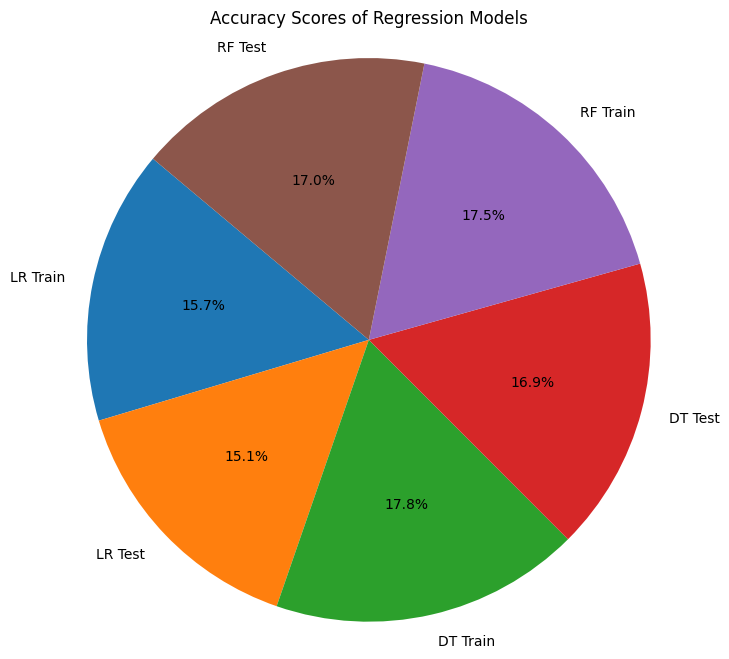

In [33]:
## Now Visualizing the ML models
# Calculate accuracy scores
lr_train_score = lr.score(X_train, y_train) * 100
lr_test_score = lr.score(X_test, y_test) * 100

dt_train_score = dt.score(X_train, y_train) * 100
dt_test_score = dt.score(X_test, y_test) * 100

rf_train_score = rf.score(X_train, y_train) * 100
rf_test_score = rf.score(X_test, y_test) * 100

# Labels and corresponding scores for the pie chart
labels = ['LR Train', 'LR Test', 'DT Train', 'DT Test', 'RF Train', 'RF Test']
scores = [lr_train_score, lr_test_score, dt_train_score, dt_test_score, rf_train_score, rf_test_score]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy Scores of Regression Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

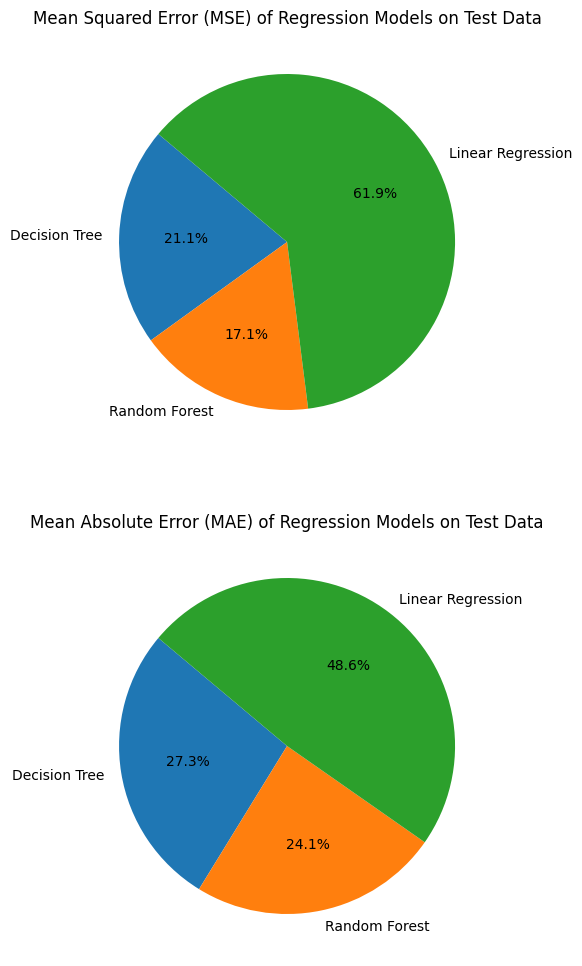

In [34]:
# Calculate MSE and MAE for each model
dt_mse = mean_squared_error(y_test, dt.predict(X_test))
dt_mae = mean_absolute_error(y_test, dt.predict(X_test))

rf_mse = mean_squared_error(y_test, rf.predict(X_test))
rf_mae = mean_absolute_error(y_test, rf.predict(X_test))

lr_mse = mean_squared_error(y_test, lr.predict(X_test))
lr_mae = mean_absolute_error(y_test, lr.predict(X_test))

# Labels and corresponding error metrics for the pie charts
models = ['Decision Tree', 'Random Forest', 'Linear Regression']
mse_values = [dt_mse, rf_mse, lr_mse]
mae_values = [dt_mae, rf_mae, lr_mae]

# Create pie charts for MSE and MAE
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Pie chart for MSE
axs[0].pie(mse_values, labels=models, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Mean Squared Error (MSE) of Regression Models on Test Data')

# Pie chart for MAE
axs[1].pie(mae_values, labels=models, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Mean Absolute Error (MAE) of Regression Models on Test Data')

# Display the pie charts
plt.show()

## Conclusion : Among all these Random Forest Gives Better accuracy score with low error